In [1]:
import numpy as nm    
import matplotlib.pyplot as plt
import pandas as pd    
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data_Sets\Mall_Customers.csv")

In [3]:
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
47,48,Female,27,40,47
148,149,Female,34,78,22
130,131,Male,47,71,9
70,71,Male,70,49,55
91,92,Male,18,59,41


In [13]:
X = df.iloc[:,3:5].values

In [16]:
from sklearn.cluster import KMeans

# Finding K using elbow 

In [24]:
k_rng = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    k_rng.append(km.inertia_)

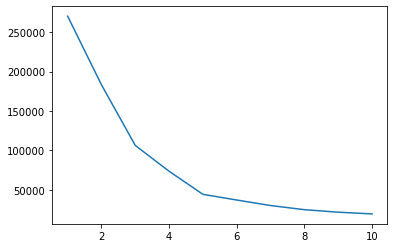

In [25]:
plt.plot(range(1, 11), k_rng)  

# Training the K-means ( K = 5 )

In [26]:
model = KMeans(n_clusters=5)
y_pred = model.fit_predict(X)

In [28]:
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [29]:
df['cluster'] = y_pred

In [31]:
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
43,44,Female,31,39,61,2
82,83,Male,67,54,41,2
41,42,Male,24,38,92,4
34,35,Female,49,33,14,3
137,138,Male,32,73,73,1


In [33]:
df['cluster'].unique()

array([3, 4, 2, 1, 0])

# Plotting the cluster's

Text(0, 0.5, 'Spending Score (1-100)')

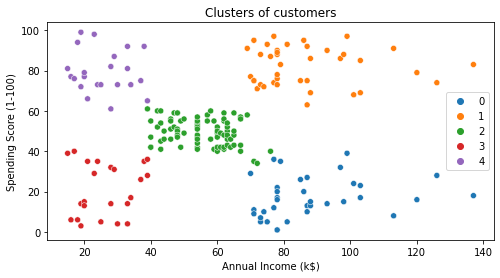

In [90]:
plt.figure(figsize=(8,4))
sns.scatterplot(x= X[:,0], y = X[:,1], hue=y_pred, palette="tab10")
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')

In [91]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

# Plotting the cluster's Centroids

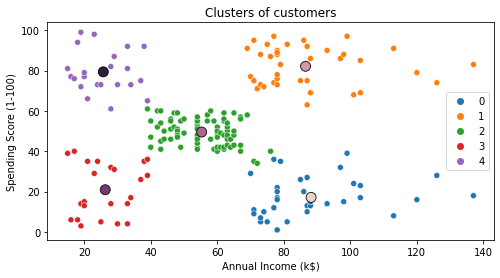

In [92]:
n_clusters = 5

plt.figure(figsize=(8,4))

ax = sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=y_pred, palette="tab10")

ax = sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1],
                     hue=range(n_clusters),s=100, ec='black', legend=False)

plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')
plt.show()

<h1 style = color:red>Observation</h1>

### ○ Cluster-0
            customer has a high income but low spending, so we can categorize them as careful.        
### ○ Cluster-1
            customers with high income and high spending so they can be categorized as target, and these customers can be 
            the most profitable customers for the mall owner. 
### ○ Cluster-2
            customers with average salary and average spending so they can be categorized as not target.
### ○ Cluster-3
            customers with low income and also low spending so they can be categorized as sensible.
### ○ Cluster-4
            customers with low income with very high spending so they can be categorized as careless.